In [126]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# read in all the words
words = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [128]:
len(words)

32033

In [129]:
# build the vocabulory of charecters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']= 0
print(stoi)
itos = {i:s for s, i in stoi.items()}
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [130]:
# building the dataset
block_size = 3 # context length 
X,Y = [],[]
for w in words[:5]:
    print(w)
    context = [0]* block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->',itos[ix])
        context = context[1:]+[ix]
X= torch.tensor(X)
Y = torch.tensor(Y)        

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [131]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [132]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [133]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [134]:
# create embeded lookup table C .There are 27 charecterecter
# and we have to embeed them with the length of 2 vector

In [135]:
# each one of 27 charecter wil have 2 level embedding
C= torch.randn((27,2))

In [136]:
C

tensor([[-0.0198,  0.5395],
        [ 1.8670, -0.5735],
        [-1.0177,  0.6238],
        [ 0.6435, -0.4241],
        [ 2.3022, -2.6622],
        [-0.5978, -0.1540],
        [-0.2309,  2.7097],
        [-1.7851, -0.0039],
        [-0.9188, -0.9731],
        [-1.0675, -0.0922],
        [ 0.1567, -1.2354],
        [ 0.9105, -0.5564],
        [-0.5933,  1.1854],
        [ 0.2473,  2.1438],
        [-1.9217,  1.3018],
        [ 1.7428, -0.7035],
        [ 0.4189, -1.4298],
        [-0.6694,  0.1817],
        [ 0.0093, -0.2852],
        [ 0.0688, -1.7854],
        [ 0.3081,  0.4363],
        [-0.9242, -0.3135],
        [-1.8202,  0.9902],
        [-0.0802, -2.1872],
        [ 1.0125,  1.1822],
        [ 0.4322, -0.0660],
        [-0.3362, -0.4982]])

In [137]:
# Before embeding the complete X into the 2-D space using C , lets embed on 
# single individual integer 5
C[5]

tensor([-0.5978, -0.1540])

In [138]:
# another way to do is , to turn 5 into one-hot encoding and then multiplying it with
# lookup embedding C

In [139]:
F.one_hot(torch.tensor(5),num_classes = 27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [140]:
F.one_hot(torch.tensor(5),num_classes = 27).float()@C

tensor([-0.5978, -0.1540])

In [141]:
# since this result is same as C[5], we can interpret the multiplipliccation 
# of one hot encoding with the C  , as indexing C with the particular integer

In [142]:
# in pytorch , we can index with the list as well
C[[5,6,7]]

tensor([[-0.5978, -0.1540],
        [-0.2309,  2.7097],
        [-1.7851, -0.0039]])

In [143]:
# this can also be indexed by using tensors
C[torch.tensor([5,6,7])]

tensor([[-0.5978, -0.1540],
        [-0.2309,  2.7097],
        [-1.7851, -0.0039]])

In [144]:
# this shape is 32*3 which is original shape and then we transformed  each element as 2 -D vector
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [145]:
emb

tensor([[[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.0198,  0.5395]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.5978, -0.1540]],

        [[-0.0198,  0.5395],
         [-0.5978, -0.1540],
         [ 0.2473,  2.1438]],

        [[-0.5978, -0.1540],
         [ 0.2473,  2.1438],
         [ 0.2473,  2.1438]],

        [[ 0.2473,  2.1438],
         [ 0.2473,  2.1438],
         [ 1.8670, -0.5735]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.0198,  0.5395]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [ 1.7428, -0.7035]],

        [[-0.0198,  0.5395],
         [ 1.7428, -0.7035],
         [-0.5933,  1.1854]],

        [[ 1.7428, -0.7035],
         [-0.5933,  1.1854],
         [-1.0675, -0.0922]],

        [[-0.5933,  1.1854],
         [-1.0675, -0.0922],
         [-1.8202,  0.9902]],

        [[-1.0675, -0.0922],
         [-1.8202,  0.9902],
         [-1.0675, -0.0922]],

        [[-1.8202,  0

In [146]:
emb.shape

torch.Size([32, 3, 2])

In [147]:
# now we have to construct the first hidden layer
# since the input  embedings have 2 length, and since it comes from 3 different parts,
# the input is 6
w1 = torch.randn((6 ,100))
b1= torch.randn(100)

In [148]:
emb

tensor([[[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.0198,  0.5395]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.5978, -0.1540]],

        [[-0.0198,  0.5395],
         [-0.5978, -0.1540],
         [ 0.2473,  2.1438]],

        [[-0.5978, -0.1540],
         [ 0.2473,  2.1438],
         [ 0.2473,  2.1438]],

        [[ 0.2473,  2.1438],
         [ 0.2473,  2.1438],
         [ 1.8670, -0.5735]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.0198,  0.5395]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [ 1.7428, -0.7035]],

        [[-0.0198,  0.5395],
         [ 1.7428, -0.7035],
         [-0.5933,  1.1854]],

        [[ 1.7428, -0.7035],
         [-0.5933,  1.1854],
         [-1.0675, -0.0922]],

        [[-0.5933,  1.1854],
         [-1.0675, -0.0922],
         [-1.8202,  0.9902]],

        [[-1.0675, -0.0922],
         [-1.8202,  0.9902],
         [-1.0675, -0.0922]],

        [[-1.8202,  0

In [149]:
# extract embedings of first charecter of 32 all sequences
emb[:,0,:]

tensor([[-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.5978, -0.1540],
        [ 0.2473,  2.1438],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [ 1.7428, -0.7035],
        [-0.5933,  1.1854],
        [-1.0675, -0.0922],
        [-1.8202,  0.9902],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [ 1.8670, -0.5735],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-1.0675, -0.0922],
        [ 0.0688, -1.7854],
        [ 1.8670, -0.5735],
        [-1.0177,  0.6238],
        [-0.5978, -0.1540],
        [-0.5933,  1.1854],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [ 0.0688, -1.7854],
        [ 1.7428, -0.7035],
        [ 0.4189, -1.4298],
        [-0.9188, -0.9731]])

In [150]:
# extract embedings of second  charecter of  all 32  sequences
emb[:,1,:]

tensor([[-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-0.5978, -0.1540],
        [ 0.2473,  2.1438],
        [ 0.2473,  2.1438],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [ 1.7428, -0.7035],
        [-0.5933,  1.1854],
        [-1.0675, -0.0922],
        [-1.8202,  0.9902],
        [-1.0675, -0.0922],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [ 1.8670, -0.5735],
        [-1.8202,  0.9902],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [-1.0675, -0.0922],
        [ 0.0688, -1.7854],
        [ 1.8670, -0.5735],
        [-1.0177,  0.6238],
        [-0.5978, -0.1540],
        [-0.5933,  1.1854],
        [-0.5933,  1.1854],
        [-0.0198,  0.5395],
        [-0.0198,  0.5395],
        [ 0.0688, -1.7854],
        [ 1.7428, -0.7035],
        [ 0.4189, -1.4298],
        [-0.9188, -0.9731],
        [-1.0675, -0.0922]])

In [151]:
# extract embedings of third  charecter of  all 32  sequences
emb[:,2,:]

tensor([[-0.0198,  0.5395],
        [-0.5978, -0.1540],
        [ 0.2473,  2.1438],
        [ 0.2473,  2.1438],
        [ 1.8670, -0.5735],
        [-0.0198,  0.5395],
        [ 1.7428, -0.7035],
        [-0.5933,  1.1854],
        [-1.0675, -0.0922],
        [-1.8202,  0.9902],
        [-1.0675, -0.0922],
        [ 1.8670, -0.5735],
        [-0.0198,  0.5395],
        [ 1.8670, -0.5735],
        [-1.8202,  0.9902],
        [ 1.8670, -0.5735],
        [-0.0198,  0.5395],
        [-1.0675, -0.0922],
        [ 0.0688, -1.7854],
        [ 1.8670, -0.5735],
        [-1.0177,  0.6238],
        [-0.5978, -0.1540],
        [-0.5933,  1.1854],
        [-0.5933,  1.1854],
        [ 1.8670, -0.5735],
        [-0.0198,  0.5395],
        [ 0.0688, -1.7854],
        [ 1.7428, -0.7035],
        [ 0.4189, -1.4298],
        [-0.9188, -0.9731],
        [-1.0675, -0.0922],
        [ 1.8670, -0.5735]])

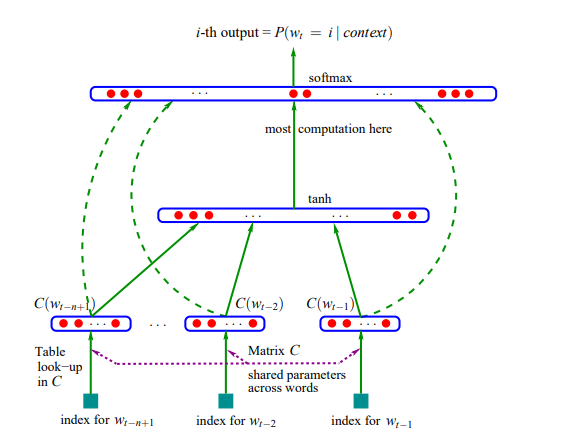

In [152]:
# concatinate all them pver 1 axis,
# this combines the emb of 1st charecter of 1st input wuth emb of 2nd charec of 1st input and emb of 3rd charec
# of 1st input   and repeats for all examples......
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)

tensor([[-0.0198,  0.5395, -0.0198,  0.5395, -0.0198,  0.5395],
        [-0.0198,  0.5395, -0.0198,  0.5395, -0.5978, -0.1540],
        [-0.0198,  0.5395, -0.5978, -0.1540,  0.2473,  2.1438],
        [-0.5978, -0.1540,  0.2473,  2.1438,  0.2473,  2.1438],
        [ 0.2473,  2.1438,  0.2473,  2.1438,  1.8670, -0.5735],
        [-0.0198,  0.5395, -0.0198,  0.5395, -0.0198,  0.5395],
        [-0.0198,  0.5395, -0.0198,  0.5395,  1.7428, -0.7035],
        [-0.0198,  0.5395,  1.7428, -0.7035, -0.5933,  1.1854],
        [ 1.7428, -0.7035, -0.5933,  1.1854, -1.0675, -0.0922],
        [-0.5933,  1.1854, -1.0675, -0.0922, -1.8202,  0.9902],
        [-1.0675, -0.0922, -1.8202,  0.9902, -1.0675, -0.0922],
        [-1.8202,  0.9902, -1.0675, -0.0922,  1.8670, -0.5735],
        [-0.0198,  0.5395, -0.0198,  0.5395, -0.0198,  0.5395],
        [-0.0198,  0.5395, -0.0198,  0.5395,  1.8670, -0.5735],
        [-0.0198,  0.5395,  1.8670, -0.5735, -1.8202,  0.9902],
        [ 1.8670, -0.5735, -1.8202,  0.9

In [153]:
emb

tensor([[[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.0198,  0.5395]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.5978, -0.1540]],

        [[-0.0198,  0.5395],
         [-0.5978, -0.1540],
         [ 0.2473,  2.1438]],

        [[-0.5978, -0.1540],
         [ 0.2473,  2.1438],
         [ 0.2473,  2.1438]],

        [[ 0.2473,  2.1438],
         [ 0.2473,  2.1438],
         [ 1.8670, -0.5735]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [-0.0198,  0.5395]],

        [[-0.0198,  0.5395],
         [-0.0198,  0.5395],
         [ 1.7428, -0.7035]],

        [[-0.0198,  0.5395],
         [ 1.7428, -0.7035],
         [-0.5933,  1.1854]],

        [[ 1.7428, -0.7035],
         [-0.5933,  1.1854],
         [-1.0675, -0.0922]],

        [[-0.5933,  1.1854],
         [-1.0675, -0.0922],
         [-1.8202,  0.9902]],

        [[-1.0675, -0.0922],
         [-1.8202,  0.9902],
         [-1.0675, -0.0922]],

        [[-1.8202,  0

In [154]:
# the above operation can be easily replicated by using emb.view() function.
# view is simlar to reshape in numpy
emb.view(32,6)

tensor([[-0.0198,  0.5395, -0.0198,  0.5395, -0.0198,  0.5395],
        [-0.0198,  0.5395, -0.0198,  0.5395, -0.5978, -0.1540],
        [-0.0198,  0.5395, -0.5978, -0.1540,  0.2473,  2.1438],
        [-0.5978, -0.1540,  0.2473,  2.1438,  0.2473,  2.1438],
        [ 0.2473,  2.1438,  0.2473,  2.1438,  1.8670, -0.5735],
        [-0.0198,  0.5395, -0.0198,  0.5395, -0.0198,  0.5395],
        [-0.0198,  0.5395, -0.0198,  0.5395,  1.7428, -0.7035],
        [-0.0198,  0.5395,  1.7428, -0.7035, -0.5933,  1.1854],
        [ 1.7428, -0.7035, -0.5933,  1.1854, -1.0675, -0.0922],
        [-0.5933,  1.1854, -1.0675, -0.0922, -1.8202,  0.9902],
        [-1.0675, -0.0922, -1.8202,  0.9902, -1.0675, -0.0922],
        [-1.8202,  0.9902, -1.0675, -0.0922,  1.8670, -0.5735],
        [-0.0198,  0.5395, -0.0198,  0.5395, -0.0198,  0.5395],
        [-0.0198,  0.5395, -0.0198,  0.5395,  1.8670, -0.5735],
        [-0.0198,  0.5395,  1.8670, -0.5735, -1.8202,  0.9902],
        [ 1.8670, -0.5735, -1.8202,  0.9

In [155]:
w1 = torch.randn((6,100))
b1 = torch.randn(100)
w1.shape

torch.Size([6, 100])

In [156]:
#creating the first hidedn layer,view(-1,6).-1 means that torch calculates internally what the shape should be.
# tanh squashes the values in range from -1 to 1
h = torch.tanh(emb.view(-1,6)@w1 +b1)

In [157]:
h

tensor([[-0.0566,  0.9592,  0.3906,  ...,  0.9728,  0.1523, -0.4386],
        [-0.3355,  0.7122, -0.6257,  ...,  0.7626, -0.5586,  0.3221],
        [-0.8588,  1.0000,  0.9889,  ...,  0.9019,  0.7349, -0.9040],
        ...,
        [ 0.0641, -0.9999, -0.8759,  ..., -0.8892,  0.3135, -0.8071],
        [-0.9942, -0.6433,  0.9603,  ..., -1.0000, -0.9709, -0.9200],
        [ 0.2705, -0.9998,  0.7428,  ..., -0.9571, -0.9941, -0.9927]])

In [158]:
h.shape

torch.Size([32, 100])

In [159]:
w2 = torch.randn((100,27))
b2 = torch.randn(27)

In [160]:
logits = h@ w2 + b2

In [161]:
logits.shape

torch.Size([32, 27])

In [162]:
logits

tensor([[ 6.6698e-01, -1.9622e+00, -1.1184e+00,  1.6784e+01,  1.0350e+01,
          6.5773e+00,  9.9130e+00, -2.2980e+00, -4.8588e+00,  9.4963e+00,
          3.9065e+00,  3.2070e+00, -1.0794e+01,  5.6560e+00, -9.1509e+00,
         -1.1116e+01, -8.6805e+00,  2.5498e+00, -2.0195e+00,  3.1669e+00,
         -2.0692e+00,  8.6661e+00,  4.3593e+00, -5.2425e+00,  8.7467e+00,
         -8.5263e+00, -2.6823e+00],
        [ 1.3472e+00, -7.5380e-01, -2.9303e+00,  1.2240e+01,  7.0963e+00,
          3.5763e+00,  9.3298e+00, -6.6815e+00, -4.2101e+00,  7.5321e+00,
          2.1418e+00, -4.8725e+00, -1.2559e+01,  1.5617e+00, -1.1840e+01,
         -1.0685e+01, -7.7339e+00, -1.6481e+00,  3.5473e+00,  1.8199e+00,
          8.6192e+00,  8.6483e+00,  2.5006e+00, -5.1043e+00,  1.3984e+01,
         -4.8807e+00, -2.4772e+00],
        [-2.4921e+00, -2.5752e+00, -1.7122e+00,  1.6885e+01,  3.0143e+00,
          1.6163e+01,  4.4867e+00, -1.1104e+01, -1.0692e+01,  6.4028e+00,
          2.1799e+00,  1.3663e+01,  7.60

In [163]:
counts = logits.exp()

In [164]:
prob = counts / counts.sum(1,keepdims = True)

In [165]:
prob

tensor([[9.9668e-08, 7.1900e-09, 1.6718e-08, 9.9601e-01, 1.5996e-03, 3.6758e-05,
         1.0329e-03, 5.1388e-09, 3.9694e-10, 6.8090e-04, 2.5437e-06, 1.2638e-06,
         1.0503e-12, 1.4630e-05, 5.4291e-12, 7.6061e-13, 8.6897e-12, 6.5499e-07,
         6.7894e-09, 1.2141e-06, 6.4604e-09, 2.9685e-04, 4.0005e-06, 2.7045e-10,
         3.2176e-04, 1.0139e-11, 3.4993e-09],
        [2.7174e-06, 3.3242e-07, 3.7708e-08, 1.4621e-01, 8.5297e-04, 2.5248e-05,
         7.9609e-03, 8.8580e-10, 1.0486e-08, 1.3189e-03, 6.0149e-06, 5.4070e-09,
         2.4817e-12, 3.3675e-06, 5.0937e-12, 1.6170e-11, 3.0923e-10, 1.3592e-07,
         2.4526e-05, 4.3595e-06, 3.9116e-03, 4.0268e-03, 8.6112e-06, 4.2882e-09,
         8.3565e-01, 5.3631e-09, 5.9326e-08],
        [1.9597e-09, 1.8034e-09, 4.2747e-09, 5.0988e-01, 4.8259e-07, 2.4786e-01,
         2.1040e-06, 3.5644e-13, 5.3808e-13, 1.4296e-05, 2.0951e-07, 2.0339e-02,
         5.0652e-08, 1.6490e-03, 6.3100e-11, 1.1400e-13, 1.8185e-13, 3.9087e-08,
         1.3269e-

In [166]:
prob.shape

torch.Size([32, 27])

In [167]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [168]:
# index into rows of prob  and find the prob corresponding to the Y
prob[torch.arange(32),Y]

tensor([3.6758e-05, 3.3675e-06, 1.6490e-03, 8.6680e-12, 1.5759e-06, 7.6061e-13,
        1.6274e-16, 7.7425e-13, 7.0798e-07, 4.0624e-06, 8.3918e-09, 2.7579e-10,
        7.1900e-09, 2.4000e-07, 2.5055e-06, 7.5327e-04, 6.8090e-04, 9.6629e-05,
        1.3876e-05, 9.9990e-01, 2.8111e-06, 4.3420e-11, 6.5495e-13, 1.1021e-10,
        8.8254e-08, 1.2141e-06, 1.3665e-03, 2.2134e-04, 9.3121e-10, 3.7184e-15,
        2.6549e-05, 1.0923e-10])

In [169]:
loss = - prob[torch.arange(32),Y].log().mean()
loss

tensor(16.5368)

In [170]:
# -----now  putting things togather---

In [171]:
X.shape,Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [172]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator = g)
W1 = torch.randn((6,100),generator = g)
b1 = torch.randn(100,generator = g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn(27,generator = g)
parameters = [C,W1,b1,W2,b2]
parameters







[tensor([[ 1.5674, -0.2373],
         [-0.0274, -1.1008],
         [ 0.2859, -0.0296],
         [-1.5471,  0.6049],
         [ 0.0791,  0.9046],
         [-0.4713,  0.7868],
         [-0.3284, -0.4330],
         [ 1.3729,  2.9334],
         [ 1.5618, -1.6261],
         [ 0.6772, -0.8404],
         [ 0.9849, -0.1484],
         [-1.4795,  0.4483],
         [-0.0707,  2.4968],
         [ 2.4448, -0.6701],
         [-1.2199,  0.3031],
         [-1.0725,  0.7276],
         [ 0.0511,  1.3095],
         [-0.8022, -0.8504],
         [-1.8068,  1.2523],
         [ 0.1476, -1.0006],
         [-0.5030, -1.0660],
         [ 0.8480,  2.0275],
         [-0.1158, -1.2078],
         [-1.0406, -1.5367],
         [-0.5132,  0.2961],
         [-1.4904, -0.2838],
         [ 0.2569,  0.2130]]),
 tensor([[ 6.1690e-01,  1.5160e+00,  2.4720e-01, -3.7767e-01, -1.9081e+00,
          -3.7170e-01, -9.8378e-01, -1.5256e-01, -6.2787e-01,  7.7023e-02,
          -1.9911e+00, -1.3050e+00, -1.3792e+00, -3.0560e-01, -5.

In [173]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [174]:
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6)@W1 + b1)# (32,100)
logits = h @ W2 + b2 # (32,27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [175]:
# Both tgive same results .This should be used for effciency
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6)@W1 + b1)# (32,100)
logits = h @ W2 + b2 # (32,27)
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims = True)
#loss = -prob[torch.arange(32),Y].log().mean()
F.cross_entropy(logits,Y)
loss

tensor(17.7697)

In [176]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator = g)
W1 = torch.randn((6,100),generator = g)
b1 = torch.randn(100,generator = g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn(27,generator = g)
parameters = [C,W1,b1,W2,b2]



In [177]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [178]:
for p in parameters:
    p.requires_grad = True

In [179]:
for _ in range(1000):
    # forward pass
    emb = C[X] # (32,3,2)
    h = torch.tanh(emb.view(-1,6)@ W1 + b1)# (32,100)
    logits = h @ W2 + b2# (32,27)
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backwards pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print('total loss:',loss.item())

17.76971435546875
13.656400680541992
11.298768997192383
9.452457427978516
7.984262943267822
6.891321182250977
6.1000142097473145
5.452035903930664
4.898151874542236
4.414664268493652
3.985848903656006
3.6028313636779785
3.262141466140747
2.961380958557129
2.6982970237731934
2.469712734222412
2.271660566329956
2.1012837886810303
1.9571765661239624
1.8374861478805542
1.7380964756011963
1.65351140499115
1.579089641571045
1.5117661952972412
1.4496047496795654
1.3913121223449707
1.3359923362731934
1.2830528020858765
1.2321910858154297
1.18338143825531
1.1367987394332886
1.0926642417907715
1.051092505455017
1.0120270252227783
0.9752707481384277
0.940556526184082
0.9076123833656311
0.876192033290863
0.8460891842842102
0.8171358704566956
0.7891990542411804
0.762174665927887
0.7359815239906311
0.7105582356452942
0.6858611106872559
0.6618651747703552
0.6385658383369446
0.6159819960594177
0.5941659808158875
0.5732105374336243
0.5532563924789429
0.5344882607460022
0.5171167850494385
0.501331448554

In [180]:
# we are not able to produce 0 exactly because in first example ...--> e , in second ...--> o and so on ..

In [181]:
# building the dataset
block_size = 3 # context length 
X,Y = [],[]
for w in words:
    context = [0]* block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:]+[ix]
X= torch.tensor(X)
Y = torch.tensor(Y)  

In [182]:
X.shape

torch.Size([228146, 3])

In [183]:
Y.shape

torch.Size([228146])

In [184]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator = g)
W1 = torch.randn((6,100),generator = g)
b1 = torch.randn(100,generator = g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn(27,generator = g)
parameters = [C,W1,b1,W2,b2]



In [185]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [186]:
for p in parameters:
    p.requires_grad = True

In [187]:
for _ in range(10):
    # forward pass
    emb = C[X] # (32,3,2)
    h = torch.tanh(emb.view(-1,6)@ W1 + b1)# (32,100)
    logits = h @ W2 + b2# (32,27)
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backwards pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

19.505226135253906
17.08448600769043
15.776532173156738
14.833340644836426
14.002603530883789
13.253262519836426
12.57991886138916
11.983101844787598
11.47049331665039
11.05185604095459


In [188]:
#In reality unlike the above examples , we take mini batch at once , do forward pass, backward pass and optimize


In [189]:
# Generatet  the random indixes of size 32  
torch.randint(0,X.shape[0],(32,))

tensor([203530, 163106,  13403, 135850,  14844, 225483,  17814, 148509, 184211,
          8209,  18090,  49934,  47876, 100107, 186400,  52986, 182814, 183569,
          8154, 171899,  33999, 182406, 147153, 156974,  34663, 218127, 153556,
        154155,  45262,  10001, 180454, 169948])

In [190]:
for _ in range(1000):
    # mini batch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,6)@ W1 + b1)# (32,100)
    logits = h @ W2 + b2# (32,27)
    loss = F.cross_entropy(logits,Y[ix])
    # backwards pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.3551104068756104


In [191]:
# How to know to select exact learning rate??

In [192]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@w1 +b1 )
logits = h@ w2 +b2
loss = F.cross_entropy(logits, Y)
loss

tensor(16.4782, grad_fn=<NllLossBackward0>)

In [193]:
# finding best learning rate

In [194]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator = g)
W1 = torch.randn((6,100),generator = g)
b1 = torch.randn(100,generator = g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn(27,generator = g)
parameters = [C,W1,b1,W2,b2]



In [195]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [196]:
for p in parameters:
    p.requires_grad = True

In [197]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [198]:
lri = []
lossi = []
for i in range(1000):
    # mini batch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,6)@ W1 + b1)# (32,100)
    logits = h @ W2 + b2# (32,27)
    loss = F.cross_entropy(logits,Y[ix])
    # backwards pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    lri.append(lr)
    lossi.append(loss.item())
#print(loss.item())

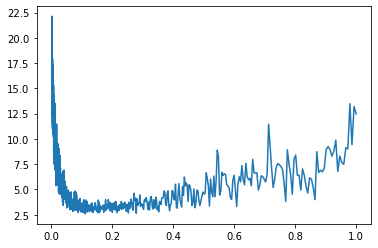

In [199]:
plt.plot(lri,lossi)

In [200]:
# a good lr turns somewhere betweer 0.0 and 0.2 .. probably 0.1

In [201]:
lri = []
lossi = []
for i in range(1000):
    # mini batch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,6)@ W1 + b1)# (32,100)
    logits = h @ W2 + b2# (32,27)
    loss = F.cross_entropy(logits,Y[ix])
    # backwards pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    lri.append(lr)
    lossi.append(loss.item())
#print(loss.item())

In [202]:
# lets again run the network with 0.1 lr

In [203]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator = g)
W1 = torch.randn((6,100),generator = g)
b1 = torch.randn(100,generator = g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn(27,generator = g)
parameters = [C,W1,b1,W2,b2]

In [204]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [205]:
for p in parameters:
    p.requires_grad = True

In [206]:
for i in range(10000):
    # mini batch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,6)@ W1 + b1)# (32,100)
    logits = h @ W2 + b2# (32,27)
    loss = F.cross_entropy(logits,Y[ix])
    # backwards pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    #lri.append(lr)
    #lossi.append(loss.item())
#print(loss.item())

In [207]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@w1 +b1 )
logits = h@ w2 +b2
loss = F.cross_entropy(logits, Y)
loss

tensor(16.5838, grad_fn=<NllLossBackward0>)